<a href="https://colab.research.google.com/github/vvrgit/Udemy-Oprimization-Basics/blob/main/Momentum_Case_Study_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

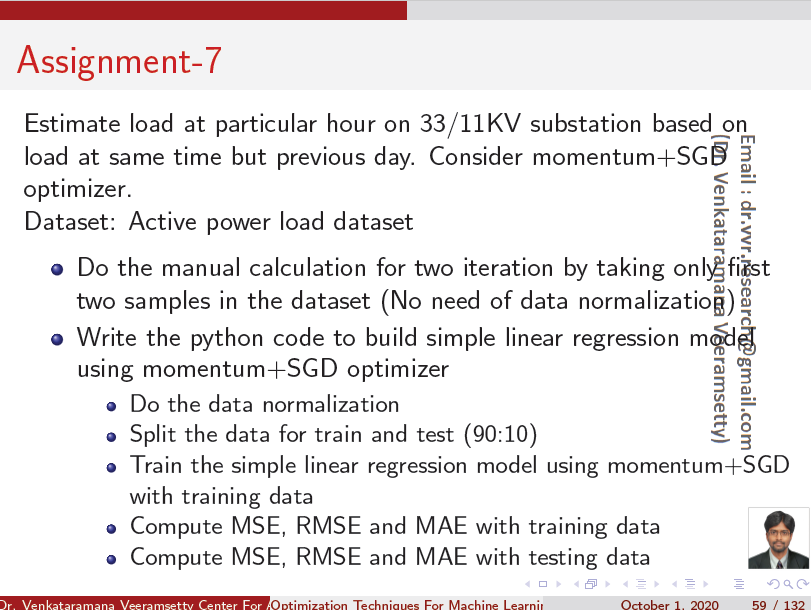

In [1]:
import pandas as pd
import random

In [9]:
data=pd.read_csv("/content/loaddata_simple_regression.csv")
data.head()

,X,Y
0,5551.82208,4931.26380
1,4983.17184,4775.53968
2,4888.39680,4713.81120
3,5072.95872,4689.02628
4,5196.25980,4844.75040


In [10]:
x_min=data["X"].min()
x_max=data["X"].max()
y_min=data["Y"].min()
y_max=data["Y"].max()

In [3]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
data[['X', 'Y']] = scaler.fit_transform(data[['X', 'Y']])
display(data.head())

,X,Y
0,0.259567,0.072876
1,0.088492,0.026027
2,0.059979,0.007456
3,0.115504,0.000000
4,0.152598,0.046849


In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data.X, data.Y, test_size=0.1, random_state=42)

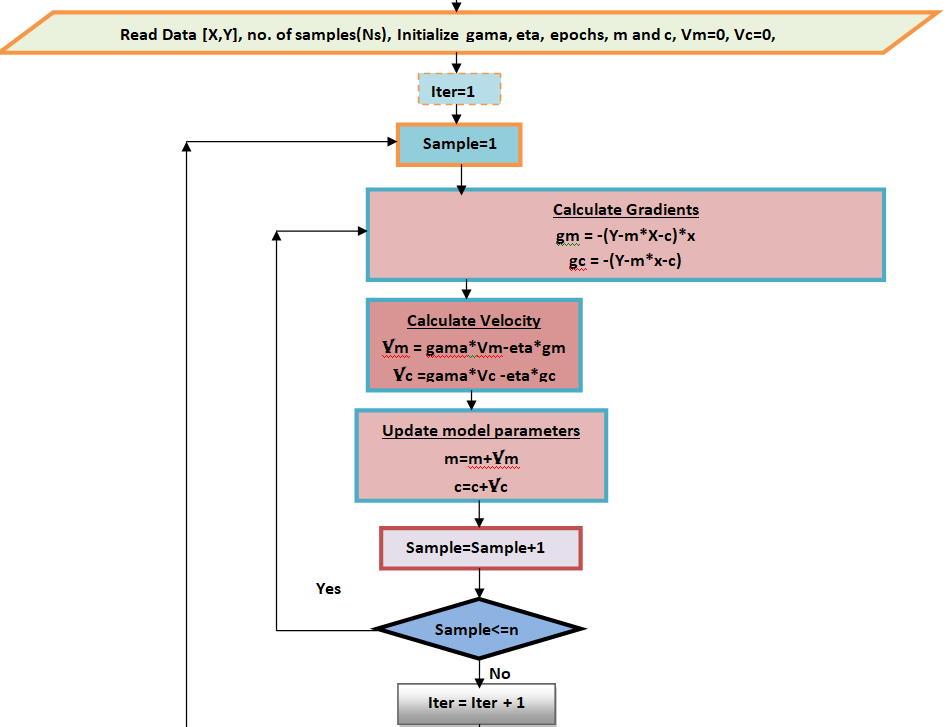

In [5]:
Ns=X_train.shape[0]
gama=0.9
eta=0.01
epochs=10
m=random.uniform(-1,1)
c=random.uniform(-1,1)
vm=0
vc=0

In [6]:
for iter in range(epochs):
  for sample in range(Ns):
    gm=-(y_train.iloc[sample]-m*X_train.iloc[sample]-c)*X_train.iloc[sample]
    gc=-(y_train.iloc[sample]-m*X_train.iloc[sample]-c)
    vm=gama*vm-eta*gm
    vc=gama*vc-eta*gc
    m=m+vm
    c=c+vc
print("m=",m)
print("c=",c)

m= 0.7536155658743113
c= 0.15469141840464878


In [7]:
y_train_pred=m*X_train+c
mse=((y_train-y_train_pred)**2).mean()
print("Training MSE=",mse)

Training MSE= 0.023185636730680158


In [8]:
y_test_pred=m*X_test+c
mse=((y_test-y_test_pred)**2).mean()
print("Testing MSE:",mse)

Testing MSE: 0.002517896240845631


In [11]:
load=input("enter previous day load on 33/11KV substation")
load=float(load)
load=(load-x_min)/(x_max-x_min)
m=0.75
c=0.15
Pred_load=m*load+c
Pred_load=Pred_load*(y_max-y_min)+y_min
print("Predicted load on 33/11KV substation:",Pred_load)

enter previous day load on 33/11KV substation5551
Predicted load on 33/11KV substation: 5834.104338
